# Building footprint (plus street network) figure-ground diagrams

Use OSMnx to download OpenStreetMap building footprints and visualize them as figure-ground diagrams.

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)

In [1]:
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)

In [2]:
# configure the inline image display
img_folder = 'images'
extension = 'png'
size = 240

## Building footprints within the city limits of Piedmont, California

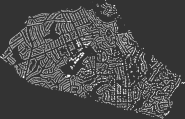

In [3]:
gdf = ox.buildings_from_place(place='Piedmont, California, USA')
gdf_proj = ox.project_gdf(gdf)
fig, ax = ox.plot_buildings(gdf_proj, bgcolor='#333333', color='w', 
                            save=True, show=False, close=True, filename='piedmont_bldgs', dpi=40)
Image('{}/{}.{}'.format(img_folder, 'piedmont_bldgs', extension), height=size, width=size)

In [4]:
# save as a shapefile
gdf_save = gdf.drop(labels='nodes', axis=1)
gdf_save.to_file('data/piedmont_bldgs')

#### Now let's analyze the size of the building footprints...

In [5]:
# calculate the area in projected units (meters) of each building footprint, then display first five
areas = gdf_proj.area
areas.head()

28861558    1803.150024
28861563     775.876377
28861579    1592.614378
28861587     905.728909
28861590    2434.779855
dtype: float64

In [6]:
# total area (sq m) covered by building footprints
sum(areas)

872654.4665751556

In [7]:
# get the total area within Piedmont's admin boundary in sq meters
place = ox.gdf_from_place('Piedmont, California, USA')
place_proj = ox.project_gdf(place)
place_proj.area.iloc[0]

4346476.012557067

In [8]:
# what proportion of piedmont is covered by building footprints?
sum(areas) / place_proj.area.iloc[0]

0.20077287072424585

## One and a half square kilometers near the Arc de Triomphe

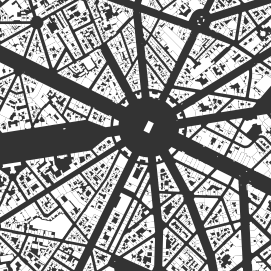

In [9]:
point = (48.873446, 2.294255)
dist = 612
gdf = ox.buildings_from_point(point=point, distance=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.bbox_from_point(point=point, distance=dist, project_utm=True)
fig, ax = ox.plot_buildings(gdf_proj, bgcolor='#333333', color='w', figsize=(4,4), bbox=bbox,
                            save=True, show=False, close=True, filename='paris_bldgs', dpi=90)
Image('{}/{}.{}'.format(img_folder, 'paris_bldgs', extension), height=size, width=size)

## Street network + building footprints: square-mile visualizations

In [10]:
# helper funcion to get one-square-mile street networks, building footprints, and plot them
def make_plot(place, point, network_type='drive', bldg_color='orange', dpi=40,
              dist=805, default_width=4, street_widths=None):
    gdf = ox.buildings_from_point(point=point, distance=dist)
    gdf_proj = ox.project_gdf(gdf)
    fig, ax = ox.plot_figure_ground(point=point, dist=dist, network_type=network_type, default_width=default_width,
                                    street_widths=street_widths, save=False, show=False, close=True)
    fig, ax = ox.plot_buildings(gdf_proj, fig=fig, ax=ax, color=bldg_color, set_bounds=False,
                                save=True, show=False, close=True, filename=place, dpi=dpi)

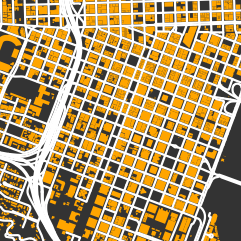

In [11]:
place = 'portland_buildings'
point = (45.517309, -122.682138)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

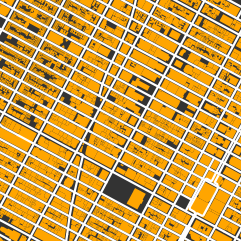

In [12]:
place = 'nyc_buildings'
point = (40.757920, -73.983393)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

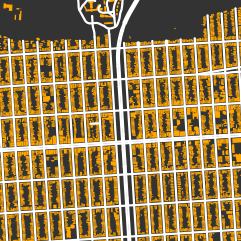

In [13]:
place = 'richmond_district_buildings'
point = (37.781999, -122.472501)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

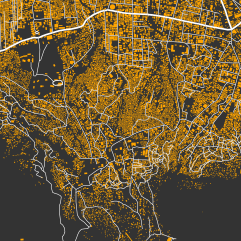

In [14]:
place = 'port_au_prince_buildings'
point = (18.522240, -72.347607)
make_plot(place, point, network_type='all', default_width=1, street_widths={'secondary':3})
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

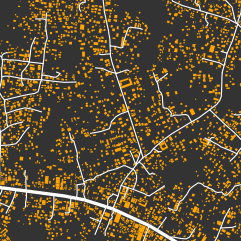

In [15]:
place = 'monrovia_liberia_buildings'
point = (6.340236, -10.747255)
make_plot(place, point, network_type='all', default_width=2, street_widths={'primary':6})
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)